Referrence: https://bhrigu.me/post/huffman-coding-python-implementation/

In [ ]:
class HeapNode:
    def __init__(self, val, freq):
        self.val = val
        self.freq = freq
        self.left = None
        self.right = None

    def __gt__(self, other):
        return self.freq > other.freq

class HuffmanEncoding:
    def __init__(self):
        self.heap = []
        self.codes = {}
        self.reverse_mapping = {}
        self.data = None

    def read_image_data(self, filename):
        img = cv2.imread(filename)
        return np.concatenate((np.array(img.shape, dtype=np.uint8), img.reshape(-1,)))

    def make_freq_table(self):
        val, freq = np.unique(self.data, return_counts=True)
        freq_table = [(val[i], freq[i]) for i in range(len(val))]
        freq_table = sorted(freq_table, key=lambda x: x[1], reverse=True)
        return freq_table

    def make_heap(self, freq_table):
        for val, freq in freq_table:
            node = HeapNode(val, freq)
            heapq.heappush(self.heap, node)

    def merge_nodes(self):
        while (len(self.heap) > 1):
            node1 = heapq.heappop(self.heap)
            node2 = heapq.heappop(self.heap)
            merged_node = HeapNode(None, node1.freq + node2.freq)
            merged_node.left = node1
            merged_node.right = node2
            heapq.heappush(self.heap, merged_node)

    def make_codes_helper(self, root, current_code):
        if (root == None):
            return
        if (root.val != None):
            self.codes[root.val] = current_code
            self.reverse_mapping[current_code] = root.val
            return
        self.make_codes_helper(root.left, current_code + "0")
        self.make_codes_helper(root.right, current_code + "1")

    def make_codes(self):
        root = heapq.heappop(self.heap)
        current_code = ""
        self.make_codes_helper(root, current_code)

    def get_encoded(self):
        encoded = ""
        for x in self.data:
            encoded += self.codes[x]
        return encoded

    def pad_encoded(self, encoded):
        extra_padding = 8 - len(encoded) % 8
        for i in range(extra_padding):
            encoded += "0"
        padded_info = "{0:08b}".format(extra_padding)
        encoded = padded_info + encoded
        return encoded

    def printTable(self):
      for i in self.codes:
        print(i)

    def compress(self, image_file, compress_file="compress.bin"):
        self.data = self.read_image_data(image_file)
        compress_map = "compress_map.txt"
        freq_table = self.make_freq_table()
        self.make_heap(freq_table)
        self.merge_nodes()
        self.make_codes()
        encoded = self.get_encoded()
        encoded = self.pad_encoded(encoded)
        bytes_array = bytearray(int(encoded[x:x+8], 2) for x in range(0, len(encoded), 8))
        
        with open(compress_file, 'wb') as output:            
            output.write(bytes(bytes_array))

        with open(compress_map, "w") as output:
            for x, y in self.reverse_mapping.items():
                output.writelines(str(x)+" "+str(y)+"\n")
        
        print("pixel \tcode")
        for i in self.codes:
          print(str(i) + "\t" + str(self.codes[i]))

        lavg = 0
        s = 0
        for i, j in freq_table:
          s = s + j 
          lavg += len(self.codes[i])*j
        print("Length average", lavg/s)

        return True

class HuffmanDecoding:
    def remove_padding(self, padded_encoded):
        padded_info = padded_encoded[:8]
        extra_padding = int(padded_info, 2)
        padded_encoded = padded_encoded[8:]
        encoded = padded_encoded[:-1*extra_padding]
        return encoded

    def decode(self, reverse_mapping, encoded):
        current_code = ""
        decoded = np.array([])
        for bit in encoded:
            current_code += bit
            if(current_code in reverse_mapping):
                val = reverse_mapping[current_code]
                decoded = np.append(decoded, val)
                current_code = ""
        return decoded

    def decompress(self, reverse_mapping_file, compress_file, decompress_file="decompress.jpg"):
        with open(compress_file, 'rb') as file:
            byte = file.read()
            bit_string = ''.join(format(x, '08b') for x in byte)            
            encoded = self.remove_padding(bit_string)

        with open(reverse_mapping_file, 'r') as mapping:
            reverse_mapping_list = mapping.readlines()
            reverse_mapping = {}
            for x in reverse_mapping_list:
                mapp = x.rstrip().split(" ")
                reverse_mapping[mapp[0]] = int(mapp[1])

        decoded = self.decode(reverse_mapping, encoded)
        img_decompress = decoded[3:].reshape(decoded[0:3].astype(int))
        cv2.imwrite(decompress_file, img_decompress)   
        return True

In [ ]:
!gdown --id 1fOxavYMOsUwI-7wv0_T0YmLluLjGPddx

Downloading...
From: https://drive.google.com/uc?id=1fOxavYMOsUwI-7wv0_T0YmLluLjGPddx
To: /content/huffman.jpg
100% 40.7k/40.7k [00:00<00:00, 5.55MB/s]


In [ ]:
import cv2
import numpy as np
import heapq

code = HuffmanEncoding()
code.compress('huffman.jpg')

pixel 	code
253	0000
252	000100
250	0001010
163	000101100000
132	0001011000010
139	0001011000011
57	00010110001
124	000101100100
164	000101100101
173	000101100110
224	000101100111
210	000101101
243	00010111
11	0001100
194	0001101000
231	00011010010
174	000110100110
175	000110100111
23	0001101010
62	000110101100
152	000110101101
225	000110101110
141	000110101111
17	00011011
33	0001110000
185	00011100010
233	00011100011
16	000111001
35	000111010
93	000111011
247	00011110
40	00011111
254	0010
170	001100000000
171	001100000001
182	00110000001
201	00110000010
54	00110000011
30	0011000010
52	00110000110
219	00110000111
10	00110001
211	00110010
55	00110011000
72	001100110010
78	001100110011
25	0011001101
184	00110011100
203	00110011101
177	001100111100
156	0011001111010
142	0011001111011
50	00110011111
14	0011010
251	0011011
85	00111000000
49	00111000001
75	001110000100
179	001110000101
159	001110000110
167	001110000111
18	001110001
217	00111001000
206	00111001001
76	0011100101
178	0011100110

True

In [ ]:
decode = HuffmanDecoding()
decode.decompress("compress_map.txt", "compress.bin")

True

(-0.5, 249.5, 248.5, -0.5)

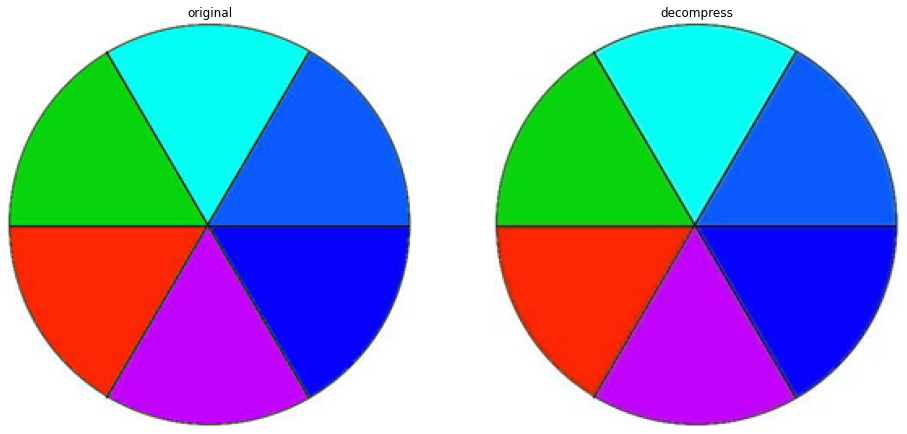

In [ ]:
import matplotlib.pyplot as plt

image1 = cv2.imread('huffman.jpg')
image2 = cv2.imread('decompress.jpg')

fig, ax = plt.subplots(1, 2, figsize=(16, 10))

ax[0].imshow(image1, cmap="gray")
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(image2, cmap="gray")
ax[1].set_title('decompress')
ax[1].axis('off')